## Azure Data Lake Gen2 to Databricks Passthrough

In [0]:
configs = {
  "fs.azure.account.auth.type": "CustomAccessToken",
  "fs.azure.account.custom.token.provider.class": spark.conf.get("spark.databricks.passthrough.adls.gen2.tokenProviderClassName")
}
dbutils.fs.mount(
  source = "abfss://nvda-stocks@stockanalysisnvdadata.dfs.core.windows.net/",
  mount_point = "/mnt/nvda-stocks",
  extra_configs = configs)

In [0]:
dbutils.fs.ls("/mnt/nvda-stocks/raw-data")

[FileInfo(path='dbfs:/mnt/nvda-stocks/raw-data/ASML.csv', name='ASML.csv', size=765283, modificationTime=1730169397000),
 FileInfo(path='dbfs:/mnt/nvda-stocks/raw-data/CDNS.csv', name='CDNS.csv', size=922886, modificationTime=1730169413000),
 FileInfo(path='dbfs:/mnt/nvda-stocks/raw-data/NVDA.csv', name='NVDA.csv', size=749014, modificationTime=1730169430000),
 FileInfo(path='dbfs:/mnt/nvda-stocks/raw-data/SNPS.csv', name='SNPS.csv', size=752961, modificationTime=1730169446000),
 FileInfo(path='dbfs:/mnt/nvda-stocks/raw-data/Samsung.csv', name='Samsung.csv', size=408294, modificationTime=1730169383000),
 FileInfo(path='dbfs:/mnt/nvda-stocks/raw-data/TSM.csv', name='TSM.csv', size=741798, modificationTime=1730169464000)]

## Data Extraction

In [0]:
from pyspark.sql import functions as F
from pyspark.sql.functions import input_file_name  

# Path to the directory containing the files
path = "/mnt/nvda-stocks/raw-data/"

# Read all CSV files in the directory and add a column to organize values for each Stock 
df_combined = (
    spark.read
    .format("csv")
    .option("header", "true")
    .option("inferSchema", "true")
    .load(path + "*.csv")
    .withColumn("Name", input_file_name())  
)

# Extract the filename without the .csv extension
df_combined = df_combined.withColumn("Name", 
                                     F.regexp_replace(F.regexp_extract("Name", r"([^/]+$)", 1), r"\.csv$", ""))

# Display the combined DataFrame
display(df_combined)


Date Open High Low Close Adj Close Volume Name 1987-06-10 0.0 2.1111109256744385 1.944443941116333 2.0 2.0 10395450 CDNS 1987-06-11 0.0 2.027777910232544 1.888888955116272 1.888888955116272 1.888888955116272 2233350 CDNS 1987-06-12 0.0 1.944443941116333 1.888888955116272 1.888888955116272 1.888888955116272 1120950 CDNS 1987-06-15 0.0 1.944443941116333 1.888888955116272 1.888888955116272 1.888888955116272 1815300 CDNS 1987-06-16 0.0 1.9166669845581055 1.8333330154418945 1.8333330154418945 1.8333330154418945 686700 CDNS 1987-06-17 0.0 1.888888955116272 1.805556058883667 1.888888955116272 1.888888955116272 891450 CDNS 1987-06-18 0.0 1.888888955116272 1.8333330154418945 1.8333330154418945 1.8333330154418945 126900 CDNS 1987-06-19 0.0 1.861111044883728 1.8333330154418945 1.861111044883728 1.861111044883728 638100 CDNS 1987-06-22 0.0 1.861111044883728 1.8333330154418945 1.8333330154418945 1.8333330154418945 276750 CDNS 1987-06-23 0.0 1.861111044883728 1.7777780294418335 1.805556058883667 1.805556058883667 554850 CDNS 1987-06-24 0.0 1.805556058883667 1.7777780294418335 1.805556058883667 1.805556058883667 337050 CDNS 1987-06-25 0.0 1.7777780294418335 1.7777780294418335 1.7777780294418335 1.7777780294418335 15300 CDNS 1987-06-26 0.0 1.805556058883667 1.7777780294418335 1.7777780294418335 1.7777780294418335 248850 CDNS 1987-06-29 0.0 1.805556058883667 1.611111044883728 1.611111044883728 1.611111044883728 355500 CDNS 1987-06-30 0.0 1.6666669845581055 1.4722219705581665 1.4722219705581665 1.4722219705581665 80550 CDNS 1987-07-01 0.0 1.6666669845581055 1.4722219705581665 1.6666669845581055 1.6666669845581055 290700 CDNS 1987-07-02 0.0 1.7222219705581665 1.5833330154418945 1.7222219705581665 1.7222219705581665 252450 CDNS 1987-07-06 0.0 1.7777780294418335 1.6666669845581055 1.6666669845581055 1.6666669845581055 95850 CDNS 1987-07-07 0.0 1.888888955116272 1.6666669845581055 1.805556058883667 1.805556058883667 470700 CDNS 1987-07-08 0.0 1.861111044883728 1.7777780294418335 1.7777780294418335 1.7777780294418335 274050 CDNS 1987-07-09 0.0 1.861111044883728 1.7222219705581665 1.7222219705581665 1.7222219705581665 124650 CDNS 1987-07-10 0.0 1.8333330154418945 1.7222219705581665 1.7222219705581665 1.7222219705581665 12150 CDNS 1987-07-13 0.0 1.7777780294418335 1.611111044883728 1.611111044883728 1.611111044883728 89100 CDNS 1987-07-14 0.0 1.694443941116333 1.611111044883728 1.6666669845581055 1.6666669845581055 115200 CDNS 1987-07-15 0.0 1.694443941116333 1.611111044883728 1.611111044883728 1.611111044883728 96750 CDNS 1987-07-16 0.0 1.7222219705581665 1.6666669845581055 1.694443941116333 1.694443941116333 28800 CDNS 1987-07-17 0.0 1.7222219705581665 1.7222219705581665 1.7222219705581665 1.7222219705581665 5850 CDNS 1987-07-20 0.0 1.7222219705581665 1.611111044883728 1.611111044883728 1.611111044883728 11700 CDNS 1987-07-21 0.0 1.7222219705581665 1.6666669845581055 1.7222219705581665 1.7222219705581665 12150 CDNS 1987-07-22 0.0 1.7222219705581665 1.611111044883728 1.638888955116272 1.638888955116272 191700 CDNS 1987-07-23 0.0 1.694443941116333 1.638888955116272 1.638888955116272 1.638888955116272 72450 CDNS 1987-07-24 0.0 1.694443941116333 1.638888955116272 1.638888955116272 1.638888955116272 6750 CDNS 1987-07-27 0.0 1.6666669845581055 1.638888955116272 1.638888955116272 1.638888955116272 100350 CDNS 1987-07-28 0.0 1.6666669845581055 1.638888955116272 1.638888955116272 1.638888955116272 151200 CDNS 1987-07-29 0.0 1.638888955116272 1.638888955116272 1.638888955116272 1.638888955116272 2700 CDNS 1987-07-30 0.0 1.6666669845581055 1.638888955116272 1.638888955116272 1.638888955116272 158400 CDNS 1987-07-31 0.0 1.7222219705581665 1.638888955116272 1.638888955116272 1.638888955116272 40950 CDNS 1987-08-03 0.0 1.7222219705581665 1.694443941116333 1.7222219705581665 1.7222219705581665 153900 CDNS 1987-08-04 0.0 1.861111044883728 1.75 1.75 1.75 53550 CDNS 1987-08-05 0.0 1.861111044883728 1.75 1.861111044883728 1.861111044883728 2700 CDNS 1987-08-06 0.0 1.8

## Data Transformation

In [0]:
# Get all float columns
float_cols = [field.name for field in df_combined.schema.fields if field.dataType.typeName() == 'double']  

# Apply rounding to each float column
for col in float_cols:
    df_combined = df_combined.withColumn(col, F.round(F.col(col), 3))

# Display the combined DataFrame
display(df_combined)


Date Open High Low Close Adj Close Volume Name 1987-06-10 0.0 2.111 1.944 2.0 2.0 10395450 CDNS 1987-06-11 0.0 2.028 1.889 1.889 1.889 2233350 CDNS 1987-06-12 0.0 1.944 1.889 1.889 1.889 1120950 CDNS 1987-06-15 0.0 1.944 1.889 1.889 1.889 1815300 CDNS 1987-06-16 0.0 1.917 1.833 1.833 1.833 686700 CDNS 1987-06-17 0.0 1.889 1.806 1.889 1.889 891450 CDNS 1987-06-18 0.0 1.889 1.833 1.833 1.833 126900 CDNS 1987-06-19 0.0 1.861 1.833 1.861 1.861 638100 CDNS 1987-06-22 0.0 1.861 1.833 1.833 1.833 276750 CDNS 1987-06-23 0.0 1.861 1.778 1.806 1.806 554850 CDNS 1987-06-24 0.0 1.806 1.778 1.806 1.806 337050 CDNS 1987-06-25 0.0 1.778 1.778 1.778 1.778 15300 CDNS 1987-06-26 0.0 1.806 1.778 1.778 1.778 248850 CDNS 1987-06-29 0.0 1.806 1.611 1.611 1.611 355500 CDNS 1987-06-30 0.0 1.667 1.472 1.472 1.472 80550 CDNS 1987-07-01 0.0 1.667 1.472 1.667 1.667 290700 CDNS 1987-07-02 0.0 1.722 1.583 1.722 1.722 252450 CDNS 1987-07-06 0.0 1.778 1.667 1.667 1.667 95850 CDNS 1987-07-07 0.0 1.889 1.667 1.806 1.806 470700 CDNS 1987-07-08 0.0 1.861 1.778 1.778 1.778 274050 CDNS 1987-07-09 0.0 1.861 1.722 1.722 1.722 124650 CDNS 1987-07-10 0.0 1.833 1.722 1.722 1.722 12150 CDNS 1987-07-13 0.0 1.778 1.611 1.611 1.611 89100 CDNS 1987-07-14 0.0 1.694 1.611 1.667 1.667 115200 CDNS 1987-07-15 0.0 1.694 1.611 1.611 1.611 96750 CDNS 1987-07-16 0.0 1.722 1.667 1.694 1.694 28800 CDNS 1987-07-17 0.0 1.722 1.722 1.722 1.722 5850 CDNS 1987-07-20 0.0 1.722 1.611 1.611 1.611 11700 CDNS 1987-07-21 0.0 1.722 1.667 1.722 1.722 12150 CDNS 1987-07-22 0.0 1.722 1.611 1.639 1.639 191700 CDNS 1987-07-23 0.0 1.694 1.639 1.639 1.639 72450 CDNS 1987-07-24 0.0 1.694 1.639 1.639 1.639 6750 CDNS 1987-07-27 0.0 1.667 1.639 1.639 1.639 100350 CDNS 1987-07-28 0.0 1.667 1.639 1.639 1.639 151200 CDNS 1987-07-29 0.0 1.639 1.639 1.639 1.639 2700 CDNS 1987-07-30 0.0 1.667 1.639 1.639 1.639 158400 CDNS 1987-07-31 0.0 1.722 1.639 1.639 1.639 40950 CDNS 1987-08-03 0.0 1.722 1.694 1.722 1.722 153900 CDNS 1987-08-04 0.0 1.861 1.75 1.75 1.75 53550 CDNS 1987-08-05 0.0 1.861 1.75 1.861 1.861 2700 CDNS 1987-08-06 0.0 1.833 1.778 1.833 1.833 7200 CDNS 1987-08-07 0.0 1.833 1.778 1.778 1.778 17100 CDNS 1987-08-10 0.0 1.806 1.722 1.722 1.722 1800 CDNS 1987-08-11 0.0 1.806 1.722 1.75 1.75 73800 CDNS 1987-08-12 0.0 1.806 1.75 1.75 1.75 11250 CDNS 1987-08-13 0.0 1.806 1.75 1.75 1.75 50850 CDNS 1987-08-14 0.0 1.75 1.75 1.75 1.75 3600 CDNS 1987-08-17 1.75 1.75 1.75 1.75 1.75 0 CDNS 1987-08-18 0.0 1.806 1.75 1.75 1.75 7200 CDNS 1987-08-19 0.0 1.75 1.75 1.75 1.75 13500 CDNS 1987-08-20 0.0 1.778 1.722 1.722 1.722 67050 CDNS 1987-08-21 0.0 1.806 1.722 1.75 1.75 282150 CDNS 1987-08-24 0.0 1.75 1.722 1.722 1.722 71100 CDNS 1987-08-25 0.0 1.833 1.722 1.778 1.778 146700 CDNS 1987-08-26 0.0 1.833 1.722 1.833 1.833 153450 CDNS 1987-08-27 0.0 1.833 1.75 1.833 1.833 81450 CDNS 1987-08-28 0.0 1.889 1.806 1.889 1.889 44100 CDNS 1987-08-31 0.0 1.917 1.806 1.917 1.917 133200 CDNS 1987-09-01 0.0 2.0 1.833 1.917 1.917 337500 CDNS 1987-09-02 0.0 2.0 1.917 1.917 1.917 97650 CDNS 1987-09-03 0.0 1.917 1.917 1.917 1.917 5400 CDNS 1987-09-04 0.0 2.0 1.917 1.972 1.972 91350 CDNS 1987-09-08 0.0 1.972 1.944 1.944 1.944 58050 CDNS 1987-09-09 0.0 2.0 1.917 1.917 1.917 13500 CDNS 1987-09-10 0.0 2.028 1.917 1.972 1.972 31050 CDNS 1987-09-11 0.0 2.028 1.972 2.028 2.028 175500 CDNS 1987-09-14 0.0 2.167 2.0 2.083 2.083 294300 CDNS 1987-09-15 0.0 2.083 2.028 2.083 2.083 131850 CDNS 1987-09-16 0.0 2.083 2.056 2.056 2.056 250200 CDNS 1987-09-17 0.0 2.111 2.056 2.111 2.111 99000 CDNS 1987-09-18 0.0 2.056 2.056 2.056 2.056 2250 CDNS 1987-09-21 0.0 2.111 1.972 1.972 1.972 54900 CDNS 1987-09-22 0.0 2.0 1.889 2.0 2.0 116550 CDNS 1987-09-23 0.0 2.028 1.944 2.028 2.028 90000 CDNS 1987-09-24 0.0 2.028 1.944 2.028 2.028 49500 CDNS 1987-09-25 0.0 2.028 2.028 2.028 2.028 22500 CDNS 1987-09-28 0.0 2.028 2.028 2.028 2.028 6750 CDNS 1987-09-29 0.0 2.056 1.972 2.056 2.056 391050 CDNS 1987-09-30 0.0 2.056 2.0 2.056 2.056 16650 CDNS 1987-10-01 0.0 2.389 2.056 2.3

### Feature Engineering

Calculating Daily Return

In [0]:
from pyspark.sql import Window
from pyspark.sql import functions as F

# Define a window partitioned by each stock
window_spec = Window.partitionBy("Name").orderBy("Date")

# Calculate daily return
df_combined = df_combined.withColumn(
    "Daily Return", 
    (F.col("Close") - F.lag("Close", 1).over(window_spec)) / F.lag("Close", 1).over(window_spec)
)


Calculating Moving Averages (7-day and 30-day moving avaerage)

In [0]:
# 7-day moving average
df_combined = df_combined.withColumn(
    "7-day MA", 
    F.avg("Close").over(window_spec.rowsBetween(-6, 0))
)

# 30-day moving average
df_combined = df_combined.withColumn(
    "30-day MA", 
    F.avg("Close").over(window_spec.rowsBetween(-29, 0))
)


In [0]:

pdf_combined = df_combined.toPandas()


## Save transformed data back to storageaccount

In [0]:

output_path = "/mnt/nvda-stocks/transformed_data/df_combined.csv"

# Write the DataFrame to the specified path in CSV format
df_combined.write.mode("overwrite").csv(output_path, header=True)


In [0]:
dbutils.fs.ls("/mnt/nvda-stocks/transformed_data")

[FileInfo(path='dbfs:/mnt/nvda-stocks/transformed_data/df_combined.csv/', name='df_combined.csv/', size=0, modificationTime=1730334864000)]

## Exploratory Data Analysis (EDA)

In [0]:
import pandas as pd

# Generate summary statistics grouped by stock name
summary_stats = pdf_combined.groupby('Name')[['Close', 'Volume', 'Daily Return', '7-day MA', '30-day MA']].describe()
print(summary_stats)

daily_return_summary = summary_stats['Daily Return']['mean']
print("Daily Return Means by Stock:")
print(daily_return_summary)

# Calculate the mean of daily return means
mean_daily_return = daily_return_summary.mean()  # Use .mean() directly on the ndarray
print("Mean of Daily Return Means for all stocks:", mean_daily_return)


          Close                ...     30-day MA              
          count          mean  ...           75%           max
Name                           ...                            
ASML     7437.0    145.163835  ...    131.932000   1043.429667
CDNS     9400.0     36.465989  ...     25.270667    310.802667
NVDA     6463.0      6.921403  ...      4.206283    126.061533
SNPS     8208.0     77.576844  ...     53.962583    598.707000
Samsung  6199.0  28927.610905  ...  45885.833333  85530.000000
TSM      6786.0     31.209326  ...     37.629000    176.143000

[6 rows x 40 columns]
Daily Return Means by Stock:
Name
ASML       0.001270
CDNS       0.000965
NVDA       0.001953
SNPS       0.000823
Samsung    0.000613
TSM        0.000868
Name: mean, dtype: float64
Mean of Daily Return Means for all stocks: 0.001081915962044796


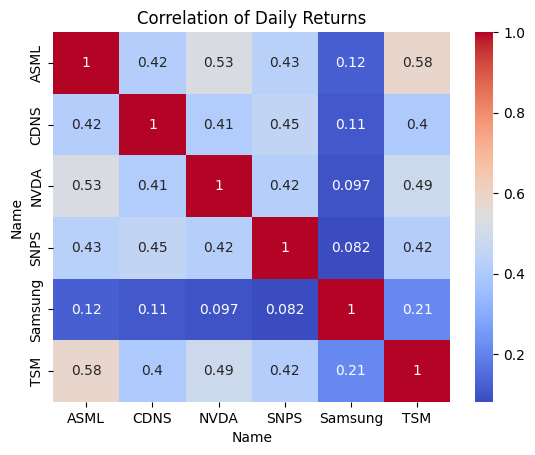

In [0]:
import matplotlib.pyplot as plt
daily_returns_pivot = pdf_combined.pivot(index='Date', columns='Name', values='Daily Return')
correlation_matrix = daily_returns_pivot.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation of Daily Returns")
plt.show()

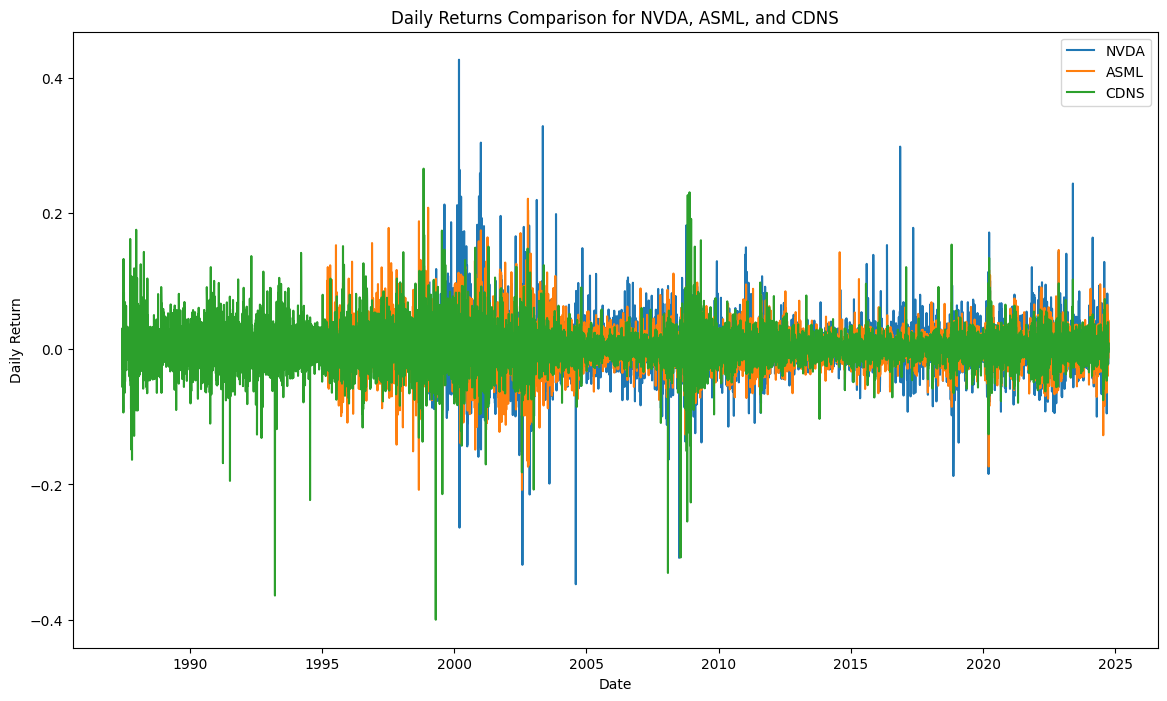

In [0]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 8))

# Filter for only NVDA, ASML, and CDNS
stocks_to_plot = ['NVDA', 'ASML', 'CDNS']
filtered_data = pdf_combined[pdf_combined['Name'].isin(stocks_to_plot)]

# Plot each selected stock's daily returns on the same plot
for stock_name in stocks_to_plot:
    stock_data = filtered_data[filtered_data['Name'] == stock_name]
    plt.plot(stock_data['Date'], stock_data['Daily Return'], label=stock_name)

# Customize the plot
plt.title("Daily Returns Comparison for NVDA, ASML, and CDNS")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()


/root/.ipykernel/1106/command-2292760605005253-1460961474:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  pdf_combined['30-day Volatility'] = pdf_combined.groupby('Name')['Daily Return'].apply(lambda x: x.rolling(window=30).std())


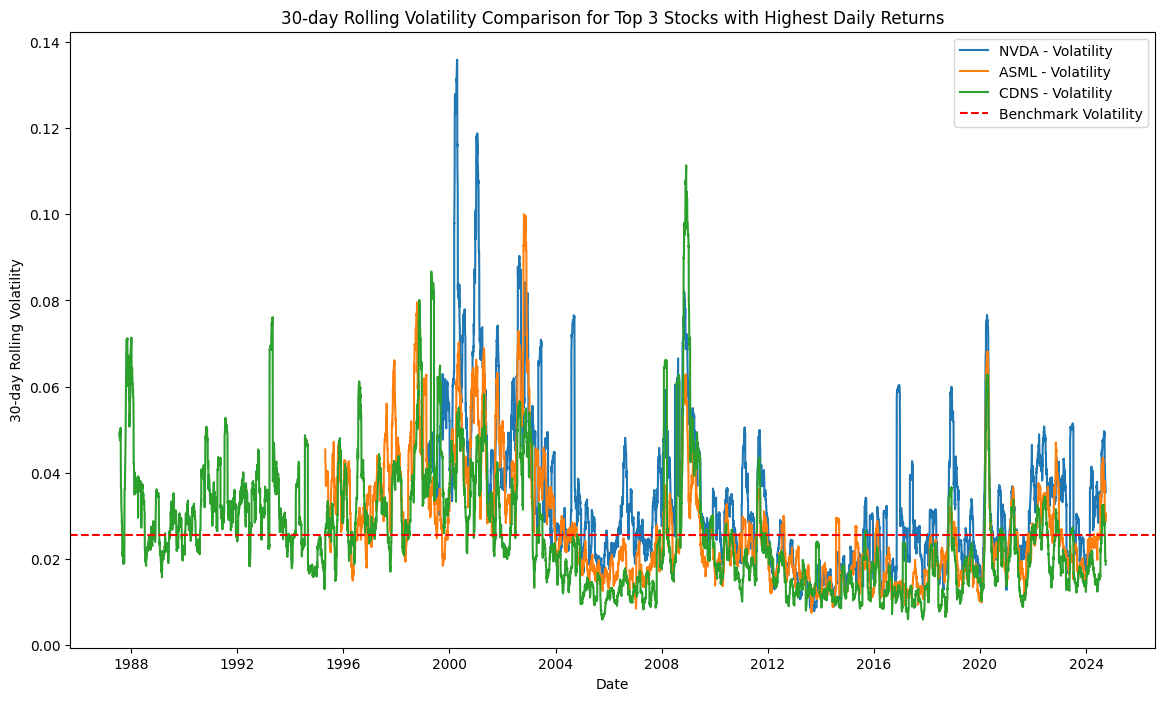

In [0]:
import matplotlib.pyplot as plt

# Calculate the average daily return for each stock
average_daily_returns = pdf_combined.groupby('Name')['Daily Return'].mean()

# Get the top 3 stocks with the highest average daily returns
top_stocks = average_daily_returns.nlargest(3).index.tolist()

# Calculate the 30-day rolling volatility for each stock
pdf_combined['30-day Volatility'] = pdf_combined.groupby('Name')['Daily Return'].apply(lambda x: x.rolling(window=30).std())

# Assume you have a benchmark return in `benchmark_returns`
benchmark_returns = mean_daily_return
benchmark_volatility = pdf_combined['Daily Return'].rolling(window=30).std().mean()

# Plot the rolling volatility for the top 3 stocks and compare to benchmark
plt.figure(figsize=(14, 8))
for stock_name in top_stocks:
    stock_data = pdf_combined[pdf_combined['Name'] == stock_name]
    plt.plot(stock_data['Date'], stock_data['30-day Volatility'], label=f"{stock_name} - Volatility")

# Add a horizontal line for the benchmark volatility
plt.axhline(y=benchmark_volatility, color='red', linestyle='--', label='Benchmark Volatility')

# Customize the plot
plt.title("30-day Rolling Volatility Comparison for Top 3 Stocks with Highest Daily Returns")
plt.xlabel("Date")
plt.ylabel("30-day Rolling Volatility")
plt.legend()
plt.show()
